In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
from numpy.random import normal

import matplotlib.pyplot as plt
from IPython.core.display import HTML

%aimport src.enkf
%aimport src.problems

%matplotlib inline

# Gaussian Process regression

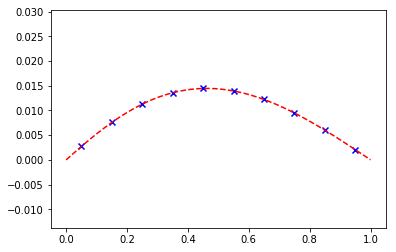

In [161]:
g, real_param, y = src.problems.PoissonUnknownRHS.prep_problem(10, measurement_points, 0)
x = np.linspace(0, 1)
plt.scatter(measurement_points, y, c='b', marker='x', label='Observations')
plt.plot(x, src.problems.PoissonUnknownRHS.eval(real_param, x), '--r', label='Real function')


(-0.25, 0.25)

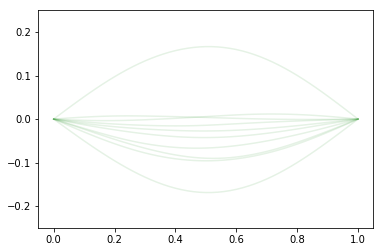

In [258]:
import fenics as fe

for i in range(10):
    u=src.problems.PoissonUnknownRHS.solve_pde(5*normal(size=10))
    fe.plot(u,alpha=0.1,c='g')

plt.ylim(-.25,.25)

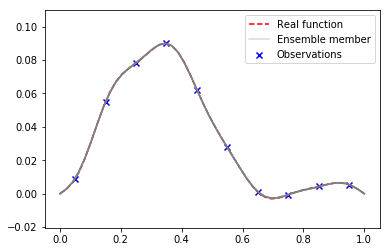

In [124]:
# parameters definition
n_expansion_terms = 10
measurement_points = np.linspace(0.05, 0.95, 10)
error_std = 1e-2

ensemble_size = 10
initial_ensemble = normal(size=ensemble_size * n_expansion_terms).reshape((ensemble_size, n_expansion_terms))

final_time = 1e4
dt = 1e1

# here, we use a 0 error to demonstrate theoretical results
#g, real_param, y = src.problems.GaussianProcessProblem.prep_problem(n_expansion_terms, measurement_points, 0)
enkf = src.enkf.ContEnKF({
    'initial_ensemble': initial_ensemble,
    'data': y,
    'model': g,
    'noise_var': error_std**2,
    'integrate_until': final_time,
    'time_step_size': dt
})

final_ensemble = enkf.compute()
x = np.linspace(0, 1)
plt.scatter(measurement_points, y, c='b', marker='x', label='Observations')
plt.plot(x, GaussianProcessProblem.eval_gp(real_param, x), '--r', label='Real function')

plt.plot(x, GaussianProcessProblem.eval_gp(final_ensemble[0,:], x), c='grey', alpha=0.3, label='Ensemble member')
for i in range(1,ensemble_size):
    plt.plot(x, GaussianProcessProblem.eval_gp(final_ensemble[i,:], x), c='grey', alpha=0.3)
plt.legend()


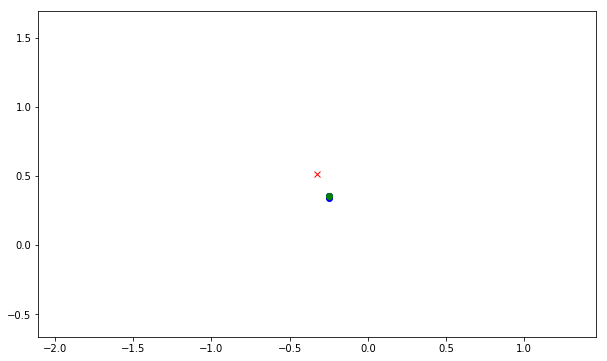

In [89]:
plot = plt.subplots(figsize=(10, 6))
HTML(enkf.plot_animation(real_param, [0, 1], plot).to_html5_video())

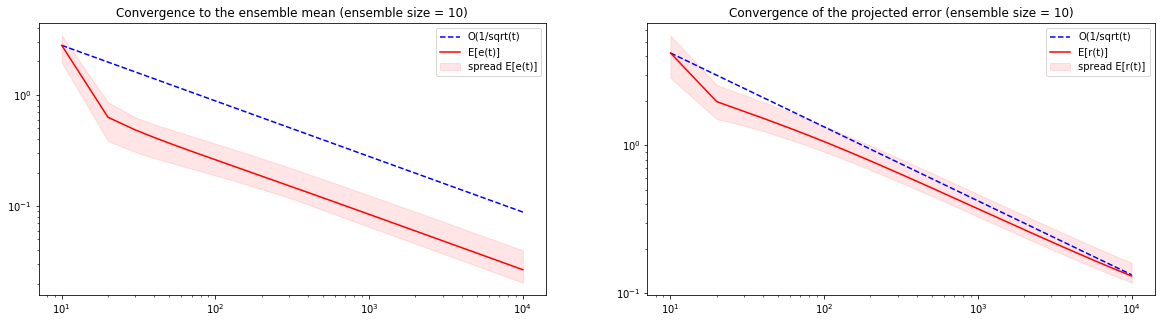

In [125]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
enkf.plot_mean_convergence()
plt.subplot(1,2,2)
enkf.plot_value_convergence(real_param)
